In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Data

In [2]:
indicators = { 
'JHDUSRGDPBR':'Recession_GDP',
'USREC': 'Recession_NBER', # Target variable
    
'GDPC1':'GDP',
'INDPRO':'Industrial_Production', # Production
    
'CPIAUCSL': 'CPI', 
'CPILFESL': 'Core_CPI',
'PPIACO': 'PPI',
'PCE': 'PCE',
'DPCCRC1M027SBEA': 'Core_PCE', # Inflation
    
'UNRATE': 'Unemployment_Rate',
'LNS12032194':'Ppl_Working_PT',
'PAYEMS':'Nonfarm_Payrolls',
'PI':'Personal_Income', # Labor
    
'UMCSENT':'UMC_Sentiment', # Consumer Sentiment

'HOUST':'New_Housing_Units',
'PERMIT':'CB_Building_Permits',# Housing

'NFCI': 'NFCI', 
'STLFSI':'ST_Fed_FSI', # Financial

}
 
data = web.DataReader(indicators.keys(), 'fred', '20040101', '20240527')
data = data.rename(columns=indicators)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2004-01-01 to 2024-05-17
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recession_GDP          80 non-null     float64
 1   Recession_NBER         244 non-null    float64
 2   GDP                    81 non-null     float64
 3   Industrial_Production  244 non-null    float64
 4   CPI                    244 non-null    float64
 5   Core_CPI               244 non-null    float64
 6   PPI                    244 non-null    float64
 7   PCE                    243 non-null    float64
 8   Core_PCE               243 non-null    float64
 9   Unemployment_Rate      244 non-null    float64
 10  Ppl_Working_PT         244 non-null    float64
 11  Nonfarm_Payrolls       244 non-null    float64
 12  Personal_Income        243 non-null    float64
 13  UMC_Sentiment          244 non-null    float64
 14  New_Housing_Units      244 non-null   

In [3]:
df_st_dt = pd.DataFrame.from_dict(
    {col: [data[col].dropna().index[0].strftime('%Y%m%d')] for col in indicators.values()}, 
    orient='index', 
    columns=['START_DATE']).sort_values('START_DATE')
 
df_end_dt = pd.DataFrame.from_dict(
    {col: [data[col].dropna().index[-1].strftime('%Y%m%d')] for col in indicators.values()}, 
    orient='index', 
    columns=['END_DATE']).sort_values('END_DATE')
                                    
pd.concat([df_st_dt, df_end_dt], axis=1)

START_DATE  END_DATE
Recession_GDP           20040101  20231001
CB_Building_Permits     20040101  20240401
New_Housing_Units       20040101  20240401
UMC_Sentiment           20040101  20240401
Personal_Income         20040101  20240301
Nonfarm_Payrolls        20040101  20240401
Ppl_Working_PT          20040101  20240401
Unemployment_Rate       20040101  20240401
Core_PCE                20040101  20240301
PCE                     20040101  20240301
PPI                     20040101  20240401
Core_CPI                20040101  20240401
CPI                     20040101  20240401
Industrial_Production   20040101  20240401
GDP                     20040101  20240101
Recession_NBER          20040101  20240401
NFCI                    20040102  20240517
ST_Fed_FSI              20040102  20200313

## Data pre-processing

In [4]:
data_resampled = data.ffill().resample('M').last()
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2004-01-31 to 2024-05-31
Freq: M
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recession_GDP          245 non-null    float64
 1   Recession_NBER         245 non-null    float64
 2   GDP                    245 non-null    float64
 3   Industrial_Production  245 non-null    float64
 4   CPI                    245 non-null    float64
 5   Core_CPI               245 non-null    float64
 6   PPI                    245 non-null    float64
 7   PCE                    245 non-null    float64
 8   Core_PCE               245 non-null    float64
 9   Unemployment_Rate      245 non-null    float64
 10  Ppl_Working_PT         245 non-null    float64
 11  Nonfarm_Payrolls       245 non-null    float64
 12  Personal_Income        245 non-null    float64
 13  UMC_Sentiment          245 non-null    float64
 14  New_Housing_Units      245 non-

In [5]:
data_resampled = data_resampled.assign(
 
    GDP_YoY=data_resampled.GDP.pct_change(12),
    IP_YoY=data_resampled.Industrial_Production.pct_change(12),
    CPI_YoY=data_resampled.CPI.pct_change(12),
    Core_CPI_YoY=data_resampled.Core_CPI.pct_change(12),
    PPI_YoY=data_resampled.PPI.pct_change(12),
    PCE_YoY=data_resampled.PCE.pct_change(12),
    Core_PCE_YoY=data_resampled.Core_PCE.pct_change(12),
    Unemployment_Rate_YoY=data_resampled.Unemployment_Rate.pct_change(12),
    Ppl_Working_PT_YoY=data_resampled.Ppl_Working_PT.pct_change(12),
    Nonfarm_Payrolls_YoY=data_resampled.Nonfarm_Payrolls.pct_change(12),
    Personal_Income_YoY=data_resampled.Personal_Income.pct_change(12),
    UMC_Sentiment_YoY=data_resampled.UMC_Sentiment.pct_change(12),
    New_Housing_Units_YoY=data_resampled.New_Housing_Units.pct_change(12),
    CB_Building_Permits_YoY=data_resampled.CB_Building_Permits.pct_change(12),
    NFCI_YoY=data_resampled.NFCI.pct_change(12),
    ST_Fed_FSI_YoY=data_resampled.ST_Fed_FSI.pct_change(12),

    
    GDP_QoQ=data_resampled.GDP.pct_change(3),
    IP_QoQ=data_resampled.Industrial_Production.pct_change(3),
    CPI_QoQ=data_resampled.CPI.pct_change(3),
    Core_CPI_QoQ=data_resampled.Core_CPI.pct_change(3),
    PPI_QoQ=data_resampled.PPI.pct_change(3),
    PCE_QoQ=data_resampled.PCE.pct_change(3),
    Core_PCE_QoQ=data_resampled.Core_PCE.pct_change(3),
    Unemployment_Rate_QoQ=data_resampled.Unemployment_Rate.pct_change(3),
    Ppl_Working_PT_QoQ=data_resampled.Ppl_Working_PT.pct_change(3),
    Nonfarm_Payrolls_QoQ=data_resampled.Nonfarm_Payrolls.pct_change(3),
    Personal_Income_QoQ=data_resampled.Personal_Income.pct_change(3),
    UMC_Sentiment_QoQ=data_resampled.UMC_Sentiment.pct_change(3),
    New_Housing_Units_QoQ=data_resampled.New_Housing_Units.pct_change(3),
    CB_Building_Permits_QoQ=data_resampled.CB_Building_Permits.pct_change(3),
    NFCI_QoQ=data_resampled.NFCI.pct_change(3),
    ST_Fed_FSI_QoQ=data_resampled.ST_Fed_FSI.pct_change(3),

    GDP_MoM=data_resampled.GDP.pct_change(1),
    IP_MoM=data_resampled.Industrial_Production.pct_change(1),
    CPI_MoM=data_resampled.CPI.pct_change(1),
    Core_CPI_MoM=data_resampled.Core_CPI.pct_change(1),
    PPI_MoM=data_resampled.PPI.pct_change(1),
    PCE_MoM=data_resampled.PCE.pct_change(1),
    Core_PCE_MoM=data_resampled.Core_PCE.pct_change(1),
    Unemployment_Rate_MoM=data_resampled.Unemployment_Rate.pct_change(1),
    Ppl_Working_PT_MoM=data_resampled.Ppl_Working_PT.pct_change(1),
    Nonfarm_Payrolls_MoM=data_resampled.Nonfarm_Payrolls.pct_change(1),
    Personal_Income_MoM=data_resampled.Personal_Income.pct_change(1),
    UMC_Sentiment_MoM=data_resampled.UMC_Sentiment.pct_change(1),
    New_Housing_Units_MoM=data_resampled.New_Housing_Units.pct_change(1),
    CB_Building_Permits_MoM=data_resampled.CB_Building_Permits.pct_change(1),
    NFCI_MoM=data_resampled.NFCI.pct_change(1),
    ST_Fed_FSI_MoM=data_resampled.ST_Fed_FSI.pct_change(1),
)

In [6]:
data_resampled = data_resampled.dropna()
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2005-01-31 to 2024-05-31
Freq: M
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recession_GDP            233 non-null    float64
 1   Recession_NBER           233 non-null    float64
 2   GDP                      233 non-null    float64
 3   Industrial_Production    233 non-null    float64
 4   CPI                      233 non-null    float64
 5   Core_CPI                 233 non-null    float64
 6   PPI                      233 non-null    float64
 7   PCE                      233 non-null    float64
 8   Core_PCE                 233 non-null    float64
 9   Unemployment_Rate        233 non-null    float64
 10  Ppl_Working_PT           233 non-null    float64
 11  Nonfarm_Payrolls         233 non-null    float64
 12  Personal_Income          233 non-null    float64
 13  UMC_Sentiment            233 non-null    float64
 14 

In [7]:
label='Recession_NBER'
label_drop = 'Recession_GDP'
features = [col for col in data_resampled if col not in [label, label_drop]]
 
pct_cols = [
    'CPI',
    'Core_CPI',
    'PPI',
    'PCE',
    'Core_PCE',
    'Unemployment_Rate',
    'UMC_Sentiment'
]

non_pct_cols = [
    'Industrial_Production',
    'Ppl_Working_PT',
    'Nonfarm_Payrolls',
    'Personal_Income',
    'New_Housing_Units',
    'CB_Building_Permits',
    'NFCI',
    'ST_Fed_FSI'
]
    
features_org = pct_cols + non_pct_cols
features_YoY = [f'{col}_YoY' for col in pct_cols] + non_pct_cols
features_QoQ = [f'{col}_QoQ' for col in pct_cols] + non_pct_cols
features_MoM = [f'{col}_MoM' for col in pct_cols] + non_pct_cols

## Correlation between original variables

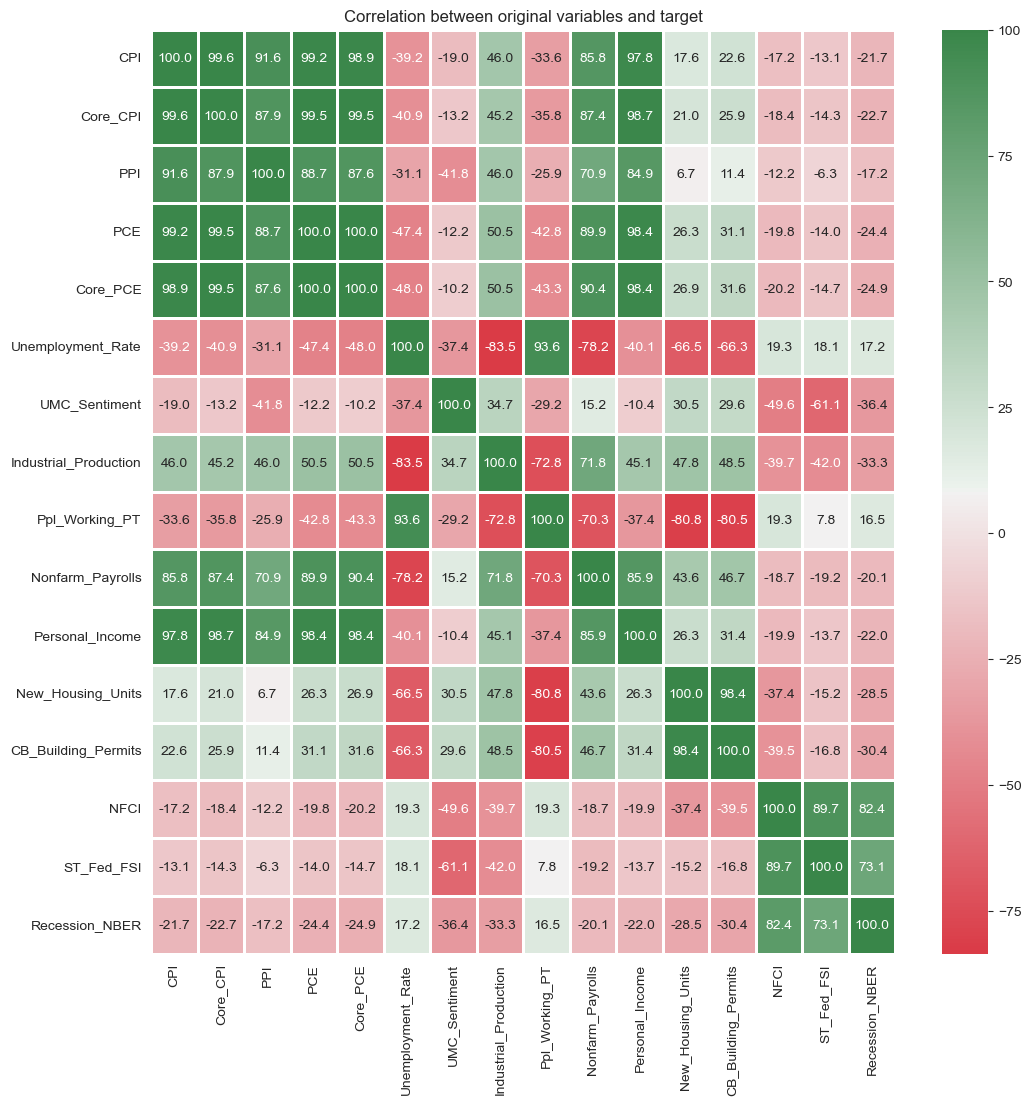

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
 
corr = data_resampled.loc[:,features_org+['Recession_NBER']].corr()*100
cmap = sns.diverging_palette(10, 133, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))    # figsize
ax = sns.heatmap(corr,
                #  mask=ut,
                 cmap=cmap,           # cmap Color
                 annot=True,            # Value Text
                 fmt=".1f",             # Value type (interge = "d")
                 linewidths=2)
ax.set_title(label=f'Correlation between original variables and target');

## Correlation between YoY variables

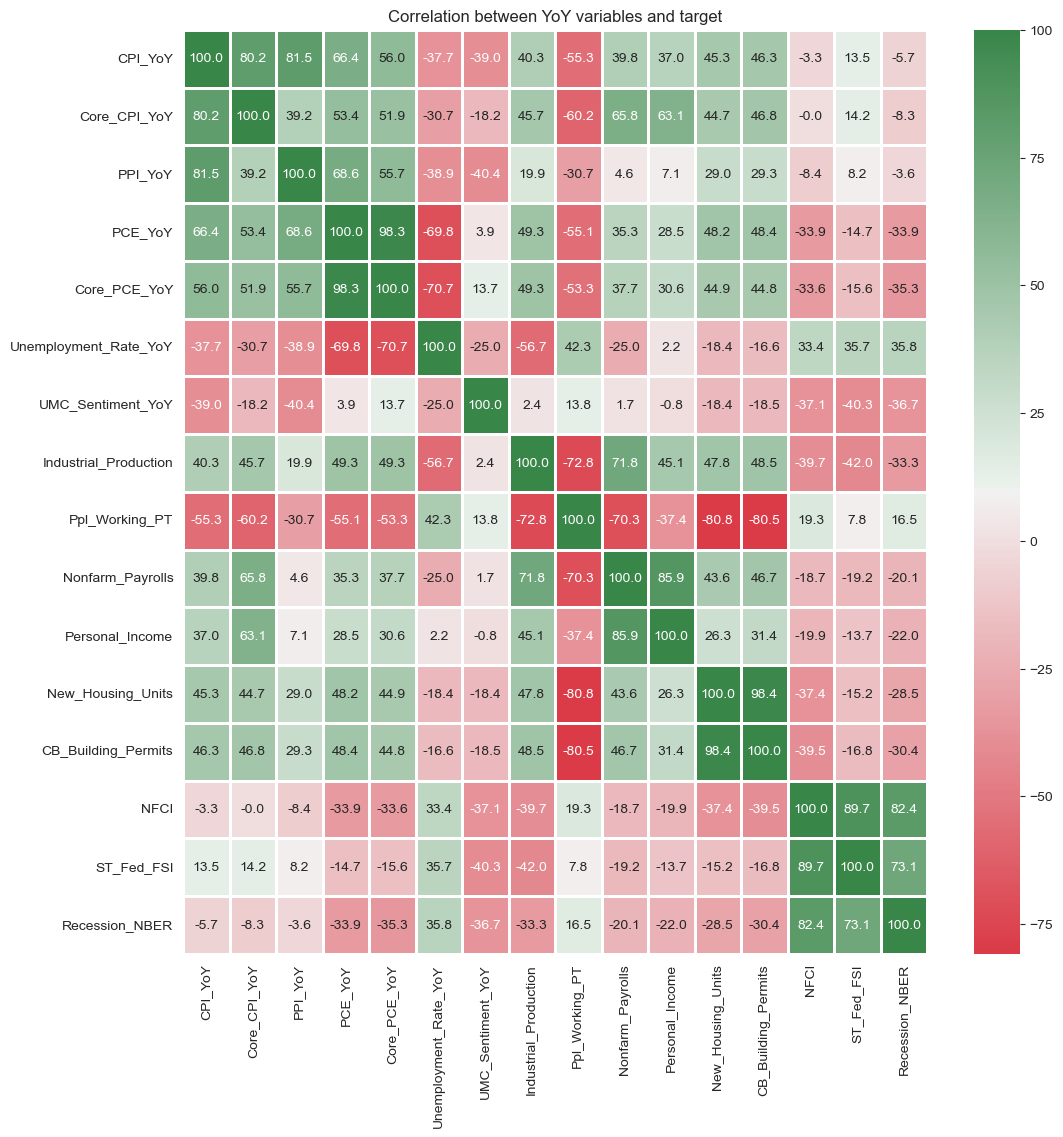

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
 
corr = data_resampled.loc[:,features_YoY+['Recession_NBER']].corr()*100
# ut = np.triu(corr)
cmap = sns.diverging_palette(10, 133, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))    # figsize
ax = sns.heatmap(corr,
                #  mask=ut,
                 cmap=cmap,           # cmap Color
                 annot=True,            # Value Text
                 fmt=".1f",             # Value type (interge = "d")
                 linewidths=2)
ax.set_title(label=f'Correlation between YoY variables and target');

## Mutual Information

Mutual information measures the amount of information obtained about one random variable through another random variable, which in this case helps understand the predictive power of each indicator regarding recessions.

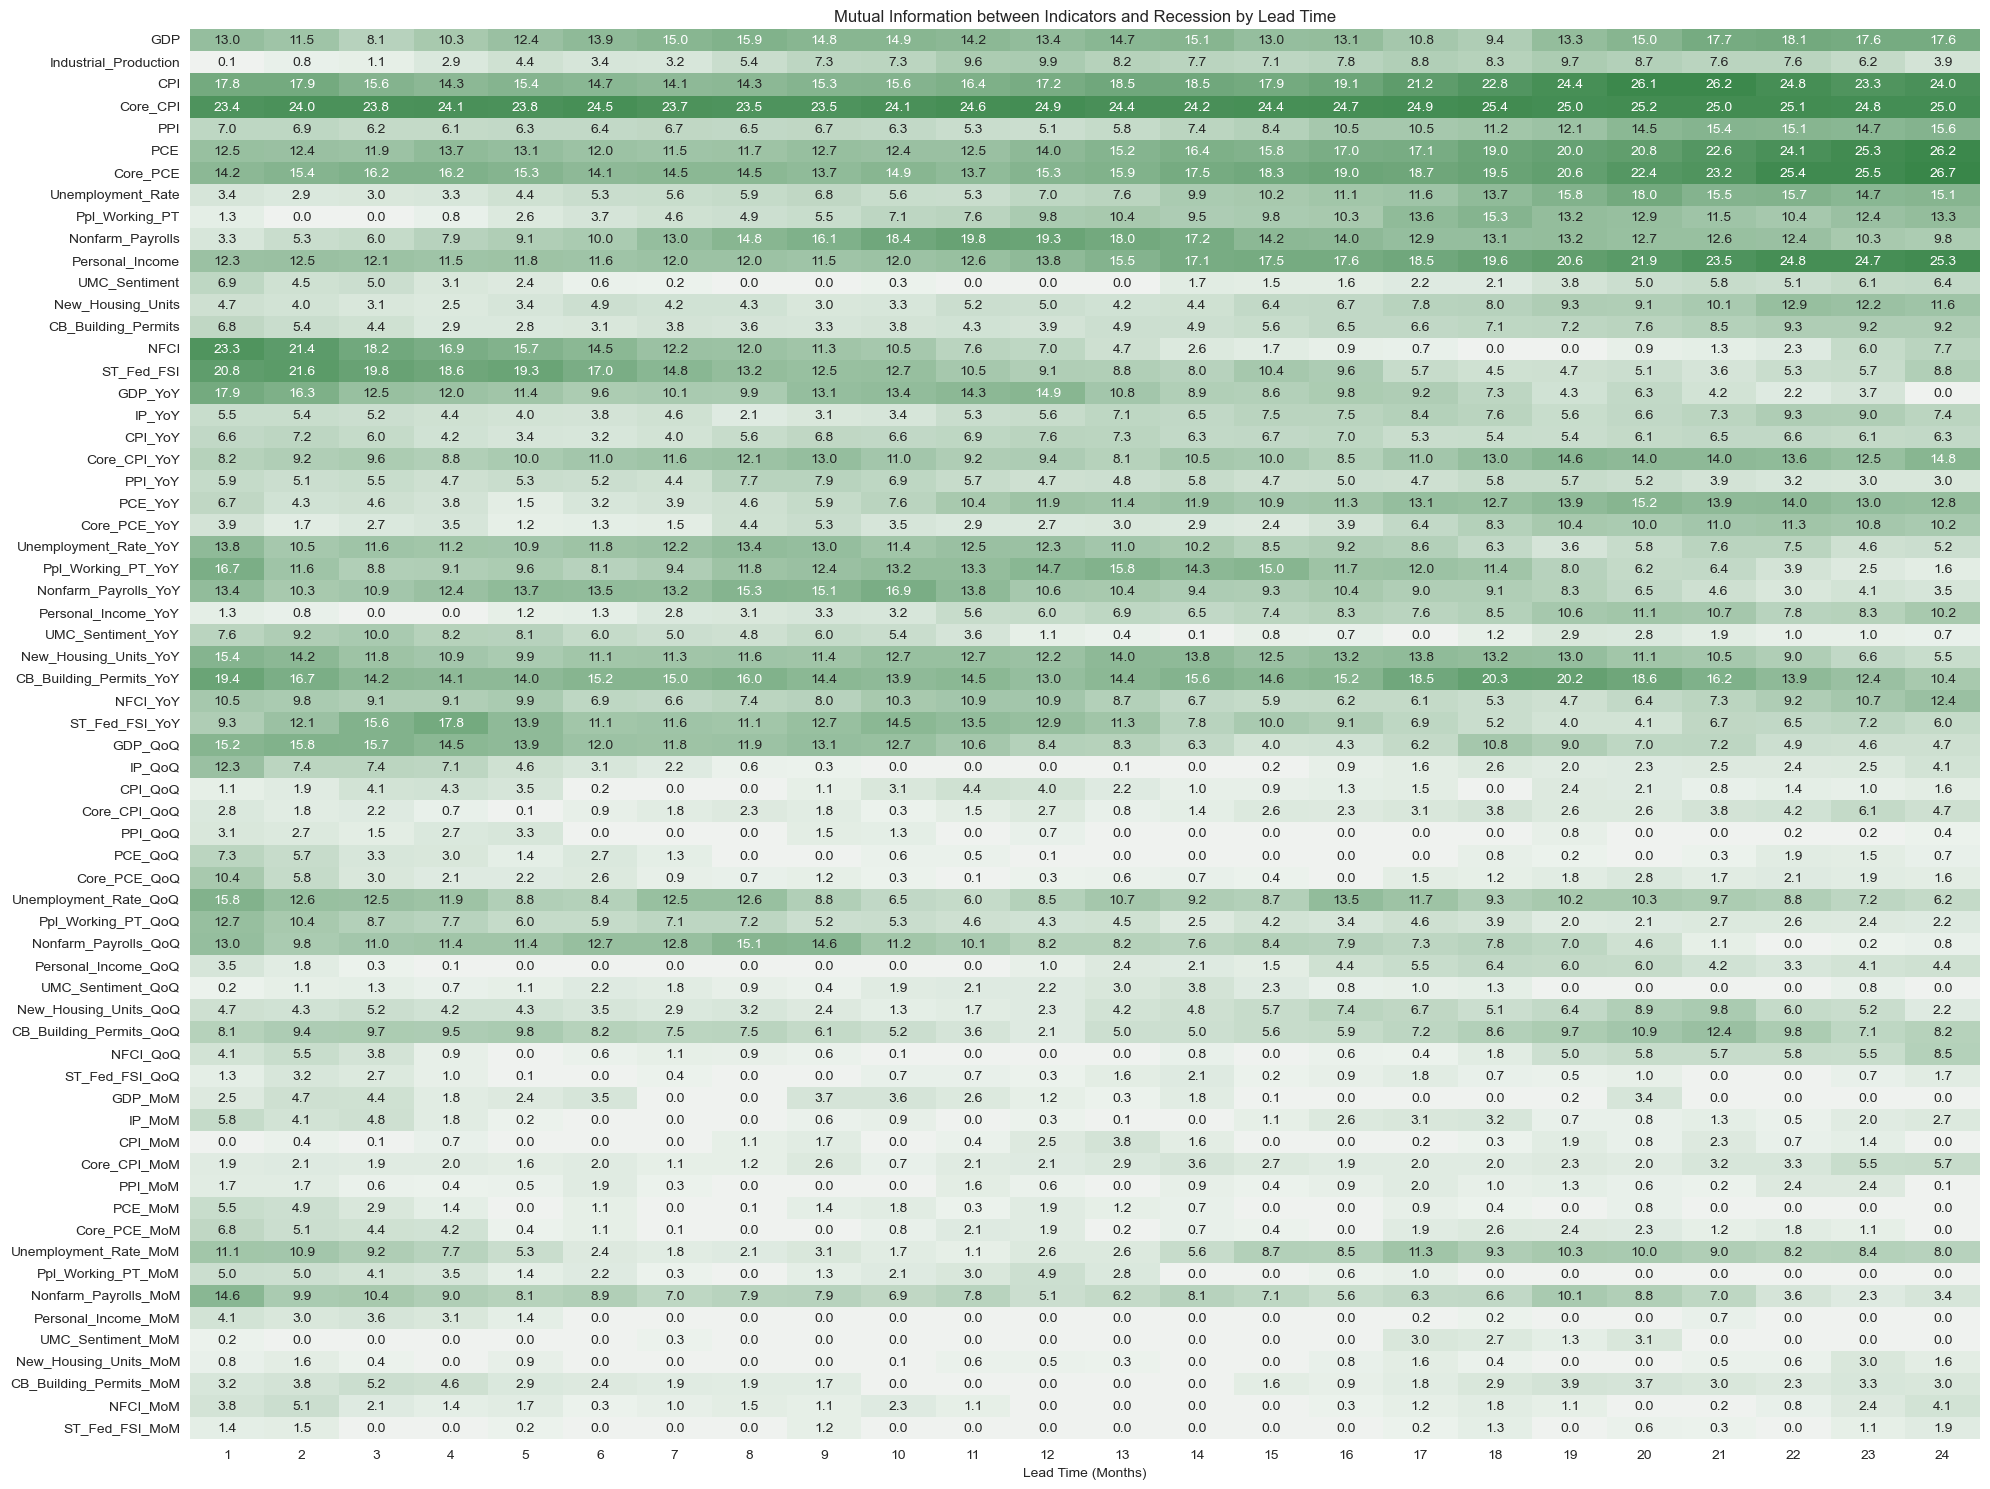

In [10]:
#### mutual information calculation
from sklearn.feature_selection import mutual_info_classif
mi = []
months = list(range(1, 25))
for month in months:
    df_ = data_resampled.copy()
    df_[label] = df_[label].shift(-month) # shift n month
    df_ = df_.dropna()
    # Mutual information between recession and each feature, n months from now
    mi.append(mutual_info_classif(df_.loc[:, features], df_[label], random_state=42))
mi = pd.DataFrame(mi, columns=features, index=months)
 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(mi.T*100, cmap=cmap, center=0, ax=ax, annot=True, fmt='.1f', cbar=False)
ax.set_xlabel('Lead Time (Months)')
ax.set_title('Mutual Information between Indicators and Recession by Lead Time')
fig.tight_layout();

## Feature Importance using Random Forest

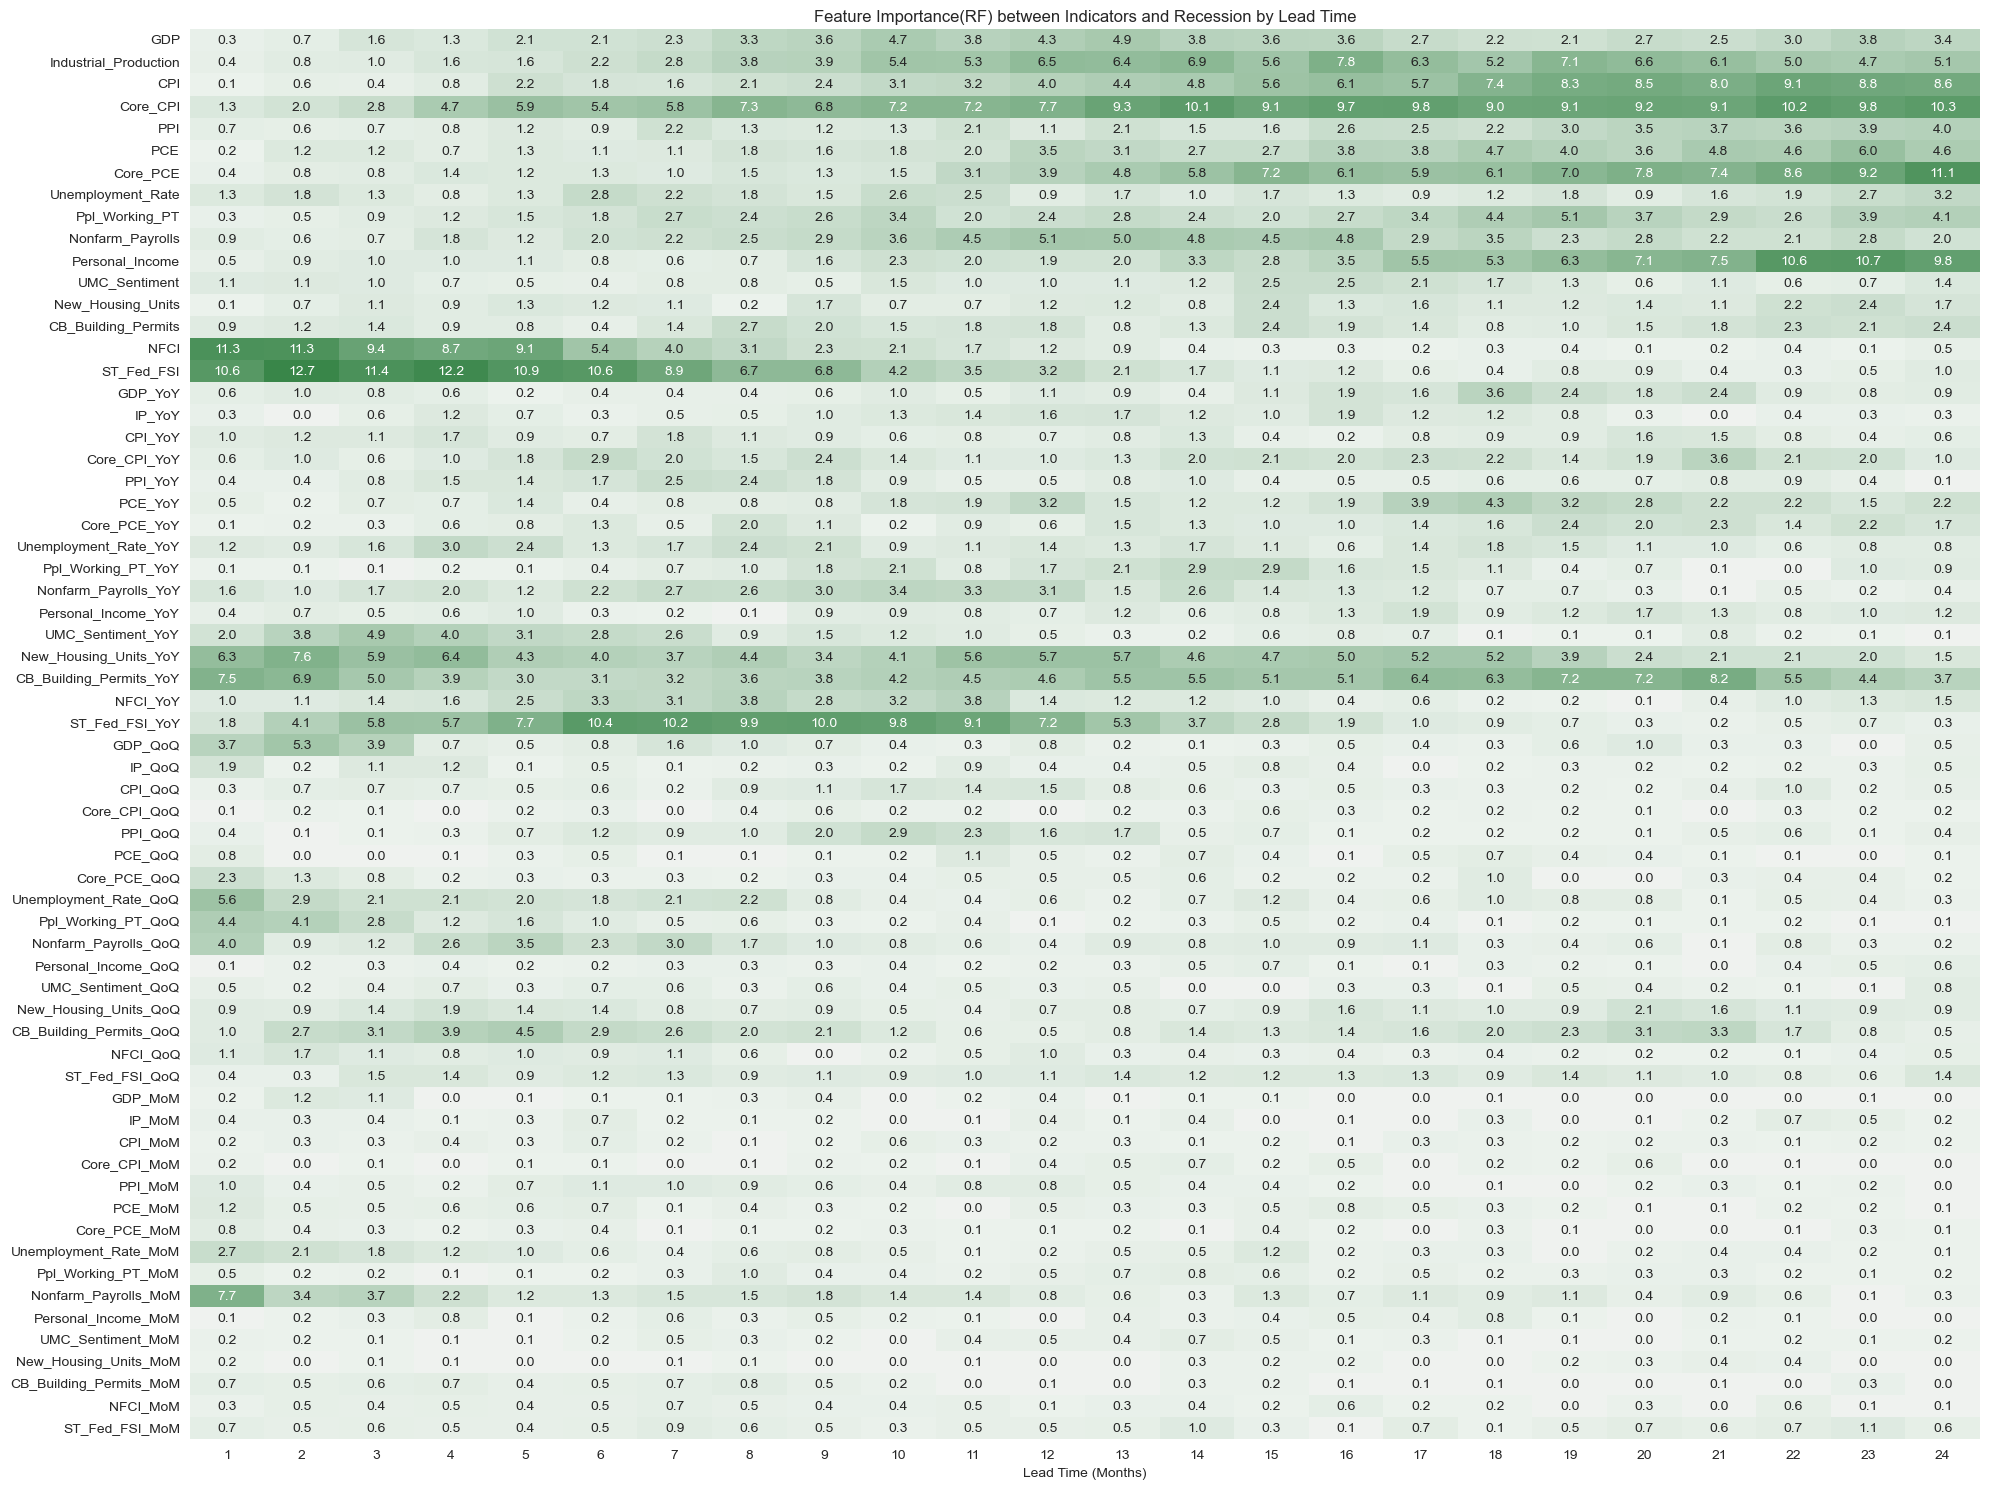

In [11]:
from sklearn.ensemble import RandomForestClassifier
#### feature importance calculation
imp = []
months = list(range(1, 25))
for month in months:
    df_ = data_resampled.copy()
    df_[label] = df_[label].shift(-month)
    df_ = df_.dropna()
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X=df_.loc[:, features], y=df_[label])
    imp.append(model.feature_importances_)
imp = pd.DataFrame(imp, columns=model.feature_names_in_, index=months)
 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(imp.T*100, cmap=cmap, center=0, ax=ax, annot=True, fmt='.1f', cbar=False)
ax.set_xlabel('Lead Time (Months)')
ax.set_title('Feature Importance(RF) between Indicators and Recession by Lead Time')
fig.tight_layout();

## Random Forest

In [12]:
label = 'Recession_NBER'
label_new = 'target'
features = [col for col in data_resampled.columns if col not in [label, label_new]]

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = data_resampled[features]
y = data_resampled['Recession_NBER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9787234042553191
Confusion Matrix:
 [[45  0]
 [ 1  1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47



Class Imbalance:

The dataset is heavily imbalanced, with many more non-recession periods (class 0) than recession periods (class 1). This can lead to a high accuracy driven by the dominant class.
Techniques to address class imbalance include:

Resampling: Oversampling the minority class or undersampling the majority class.
Synthetic Data Generation: Using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
Class Weights: Adjusting the weights of classes in the Random Forest classifier.
Evaluation Metrics:

Given the class imbalance, metrics like precision, recall, and F1-score are more informative than accuracy.
Precision for class 1 is high, but recall is low, indicating that the model is not capturing all recession periods.
Model Tuning:

Further tuning of the Random Forest hyperparameters (e.g., number of trees, max depth) might improve performance.
Considering other algorithms like Gradient Boosting, which can sometimes handle imbalanced datasets better, might also be beneficial.

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 10})
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)

y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training Classification Report:\n", train_class_report)

print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Training Accuracy: 1.0
Training Confusion Matrix:
 [[168   0]
 [  0  18]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       168
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186

Test Accuracy: 0.9787234042553191
Test Confusion Matrix:
 [[45  0]
 [ 1  1]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47



By assigning a higher weight to the minority class (recession periods), the model should place more emphasis on correctly identifying these periods, potentially improving recall for class 1. Adjust the weight as necessary based on performance.

In [15]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.93617021 0.9787234  1.         0.95652174 0.95652174]
Mean cross-validation score: 0.9655874190564292


In [16]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 10})

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.91489362 1.         1.         1.         0.95652174]
Mean cross-validation score: 0.9742830712303423


In [17]:
import pandas as pd
import plotly.express as px

features = [col for col in data_resampled.columns if col not in [label, label_new]]

X_train = data_resampled.loc[:'2023-06-30', features]
y_train = data_resampled.loc[:'2023-06-30', 'Recession_NBER']
X_test = data_resampled.loc['2023-07-31':, features]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pred = pd.DataFrame({'Date': X_test.index.strftime('%Y%m'), 'Recession prob.': model.predict_proba(X_test)[:,1]})

fig = px.line(pred, x='Date', y='Recession prob.')
fig.update_layout(title='Recession prob. within 12 months', title_x=0.5)
fig.show()